# SMT Python Seminar - Machine learning

* machine learning with Scikit-learn

## Enabling some magic

More on the Jupyter magic commands: https://alexsm.com/jupyter-notebook-ipython-magic/

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Imports

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import math

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import load_boston
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

## ML demo

In [4]:
boston_data = load_boston()

boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
X = boston_data['data']
y = boston_data['target']

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [7]:
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [8]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (506, 13)
Shape of y: (506,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

In [10]:
def hist_grid(X, colnames, n_cols=4, **hist_kwargs):

    n_rows = math.ceil(len(colnames) / n_cols)

    for j, colname in enumerate(colnames):
        plt.subplot(n_rows, n_cols, j+1)
        
        col = X[:, j]
        plt.hist(col, **hist_kwargs)

        plt.title(colname)

        
def mse(x1, x2):
    return np.mean((x1 - x2)**2)

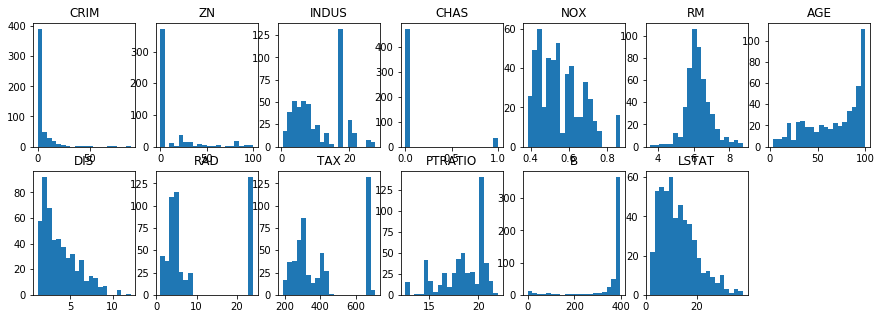

In [11]:
plt.figure(figsize=(15, 5))
hist_grid(X, boston_data['feature_names'], n_cols=7, bins=20)

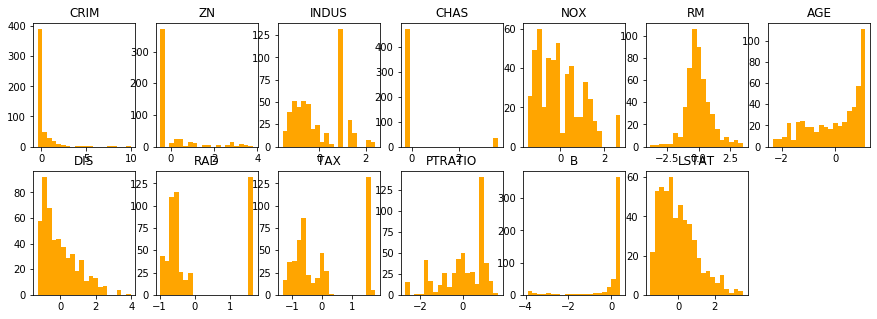

In [12]:
plt.figure(figsize=(15, 5))
hist_grid(X_scaled, boston_data['feature_names'], n_cols=7, bins=20, color='orange')

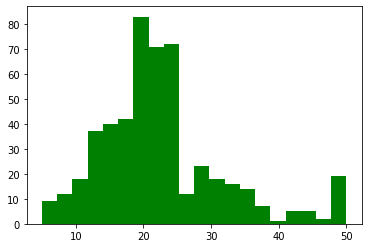

In [13]:
_ = plt.hist(y, bins=20, color='green')

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [14]:
models = {
    'neural_network': MLPRegressor(hidden_layer_sizes=(50, 20), solver='lbfgs', random_state=42),
    'decision_tree': DecisionTreeRegressor(random_state=42),
    'random_forest': RandomForestRegressor(n_estimators=50, random_state=42)
}

for model_name, model in models.items():
    print('Training', model_name)
    model.fit(X_train, y_train)
    
predicted = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    predicted[model_name] = y_pred 

Training neural_network
Training decision_tree
Training random_forest


In [15]:
for model_name, y_pred in predicted.items():
    
    print(model_name, r2_score(y_test, y_pred), mse(y_test, y_pred))

neural_network 0.8192290225259683 12.658875208099948
decision_tree 0.8465836741870817 10.743307086614173
random_forest 0.855185529227128 10.140943748031498


In [16]:
cv_scores = {}
for model_name, model in models.items():
    current_scores = cross_val_score(model, X_scaled, y, cv=5)
    cv_scores[model_name] = current_scores

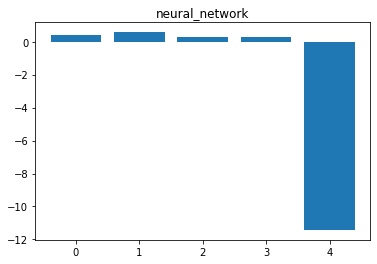

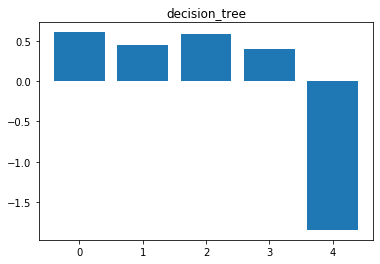

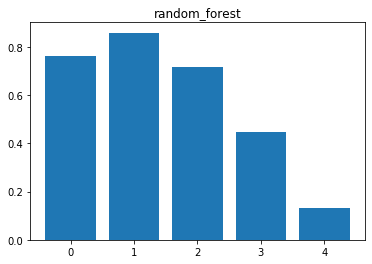

In [17]:
for model_name, current_scores in cv_scores.items():
    plt.figure()
    plt.bar(range(len(current_scores)), current_scores)
    plt.title(model_name)

In [18]:

random_forest_grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    {'n_estimators': [10, 50, 100]},
    cv=5,
    iid=False
)

gs_res = random_forest_grid_search.fit(X_scaled, y)

In [19]:
gs_res.cv_results_

{'mean_fit_time': array([0.02312937, 0.11320925, 0.23812423]),
 'std_fit_time': array([0.00142573, 0.00269982, 0.00349662]),
 'mean_score_time': array([0.00112138, 0.00299368, 0.00546427]),
 'std_score_time': array([9.46141054e-05, 2.50502606e-04, 7.45494896e-04]),
 'param_n_estimators': masked_array(data=[10, 50, 100],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}],
 'split0_test_score': array([0.73763247, 0.76502716, 0.76825622]),
 'split1_test_score': array([0.8375854 , 0.85967069, 0.86350545]),
 'split2_test_score': array([0.68385841, 0.71570165, 0.740422  ]),
 'split3_test_score': array([0.42097032, 0.44908054, 0.46713927]),
 'split4_test_score': array([0.00351427, 0.13159533, 0.23837121]),
 'mean_test_score': array([0.53671217, 0.58421507, 0.61553883]),
 'std_test_score': array([0.30008061, 0.26419065, 0.23007985]),
 'rank_test_score': array([3, 2, 1], dty

In [20]:
best_model = gs_res.best_estimator_

In [21]:
y_pred_best = best_model.predict(X_test)

In [22]:
pd.DataFrame({
    'y_test': y_test,
    'predicted': y_pred_best,
    'abs_diff': abs(y_pred_best - y_test)
})

,y_test,predicted,abs_diff
0,23.6,23.368,0.232
1,32.4,32.219,0.181
2,13.6,14.255,0.655
3,22.8,22.822,0.022
4,16.1,16.207,0.107
5,20.0,20.404,0.404
6,17.8,18.545,0.745
7,14.0,14.496,0.496
8,19.6,19.983,0.383
9,16.8,17.972,1.172
